In [39]:
##################################################
# Sentiment Analysis and Sentiment Modeling for Amazon Reviews
##################################################

In [40]:
##################################################
# Business Problem
##################################################
# Amazon üzerinden satışlarını gerçekleştiren ev tesktili ve günlük giyim odaklı üretimler yapan Kozmos ürünlerine
# gelen yorumları analiz ederek ve aldığı şikayetlere göre özelliklerini geliştirerek satışlarını artırmayı hedeflemektedir.
# Bu hedef doğrultusunda yorumlara duygu analizi yapılarak etiketlencek ve   etiketlenen veri ile sınıflandırma modeli
# oluşturulacaktır.

In [41]:
##################################################
# Veri Seti Hikayesi
##################################################
# Veri seti belirli bir ürün grubuna ait yapılan yorumları, yorum başlığını, yıldız sayısını ve yapılan yorumu
# kaç kişinin faydalı bulduğunu belirten değişkenlerden oluşmaktadır.

# Review: Ürüne yapılan yorum
# Title: Yorum içeriğine verilen başlık, kısa yorum
# HelpFul: Yorumu faydalı bulan kişi sayısı
# Star: Ürüne verilen yıldız sayısı

In [42]:
##############################################################
# Görevler
##############################################################

# Görev 1: Metin ön işleme işlemleri.
        # 1. amazon.xlsx datasını okutunuz.
        # 2. "Review" değişkeni üzerinde
            # a. Tüm harfleri küçük harfe çeviriniz
            # b. Noktalama işaretlerini çıkarınız
            # c. Yorumlarda bulunan sayısal ifadeleri çıkarınız
            # d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız
            # e. 1000'den az geçen kelimeleri veriden çıkarınız
            # f. Lemmatization işlemini uygulayınız

# Görev 2: Metin Görselleştirme
        # Adım 1: Barplot görselleştirme işlemi
                  # a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz
                  # b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde
                  # c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.

       # Adım 2: WordCloud görselleştirme işlemi
                 # a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz
                 # b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz
                 # c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.
                 # d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)

# Görev 3: Duygu Analizi
      # Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz

      # Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarının incelenmesi
                # a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız
                # b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz
                # c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz
                # d. "Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz

# NOT:SentimentIntensityAnalyzer ile yorumları etiketleyerek, yorum sınıflandırma makine öğrenmesi modeli için bağımlı değişken oluşturulmuş oldu.


# Görev 4: Makine öğrenmesine hazırlık!
        # Adım 1: Bağımlı ve bağımsız değişkenlerimizi belirleyerek datayı train test olara ayırınız.
        # Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte.
                  # a. TfidfVectorizer kullanarak bir nesne oluşturunuz.
                  # b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.
                  # c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.

# Görev 5: Modelleme (Lojistik Regresyon)
    # Adım 1: Lojistik regresyon modelini kurarak train dataları ile fit ediniz.
    # Adım 2: Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz.
        # a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.
        # b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.
        # c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız
   # Adım 3: Veride bulunan yorumlardan ratgele seçerek modele sorulması.
        # a. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçierek yeni bir değere atayınız
        # b. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.
        # c. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.
        # d. Kurmuş olduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.
        # e. Örneklemi ve tahmin sonucunu ekrana yazdırınız.

# Görev 6: Modelleme (Random Forest)
        # Adım 1: Random Forest modeliiletahminsonuçlarınıngözlenmesi;
                 # a. RandomForestClassifier modelini kurup fit ediniz.
                 # b. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız
                 # c. Lojistik regresyon modeli ile sonuçları karşılaştırınız.

############################################################################################################################

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from warnings import filterwarnings
import nltk

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [44]:
##############################################################
# TEXT PRE-PROCESSING
##############################################################
# Görev 1: Metin ön işleme işlemleri.
        # 1. amazon.xlsx datasını okutunuz.
        # 2. "Review" değişkeni üzerinde
            # a. Tüm harfleri küçük harfe çeviriniz
            # b. Noktalama işaretlerini çıkarınız
            # c. Yorumlarda bulunan sayısal ifadeleri çıkarınız
            # d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız
            # e. 1000'den az geçen kelimeleri veriden çıkarınız
            # f. Lemmatization işlemini uygulayınız

In [45]:
amazon = pd.read_excel("amazon.xlsx")
df = amazon.copy()

In [46]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [48]:
###############################
# Normalizing Case Folding
###############################

df['Review'] = df['Review'].str.lower()

In [49]:
###############################
# Punctuations
###############################

df['Review'] = df['Review'].str.replace('[^\w\s]', '')

In [50]:
###############################
# Numbers
###############################

df['Review'] = df['Review'].str.replace('\d', '')

In [51]:
###############################
# Stopwords
###############################

nltk.download('stopwords')

sw = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
df['Review'].head()

,Review
0,happy
1,good quality material however panels mis-matched.
2,product fun bedroom windows.<br />imagery bit ...
3,lo unico que gustaria es que sean un poco mas ...
4,great bang buck can't believe quality material...


In [53]:
###############################
# Rarewords / Custom Words
###############################

temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000 :]
temp_df

,count
lavender,1
taupe/gray/smoke/tan,1
pine,1
#perfect,1
go's,1
...,...
inserts,1
months.<br>stood,1
bleak,1
requested,1


In [54]:
drops = temp_df[temp_df <= 1]
drops

,count
lavender,1
taupe/gray/smoke/tan,1
pine,1
#perfect,1
go's,1
...,...
inserts,1
months.<br>stood,1
bleak,1
requested,1


In [55]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [56]:
###############################
# Lemmatization
###############################

nltk.download('wordnet')

df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
df["Review"]

,Review
0,happy
1,good quality material however panel mis-matched.
2,product fun bedroom windows.<br />imagery bit ...
3,lo unico que gustaria e que sean un poco ma la...
4,great bang buck can't believe quality material...
...,...
5606,great product reasonable money. delivered quic...
5607,color way panel match
5608,great studio complement entire theme area. pho...
5609,brought beauty kid room. love it.


In [58]:
##############################################################
# # Görev 2: Metin Görselleştirme
##############################################################

In [59]:
###############################
# Barplot
###############################
# Adım 1: Barplot görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz
        # b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde
        # c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.

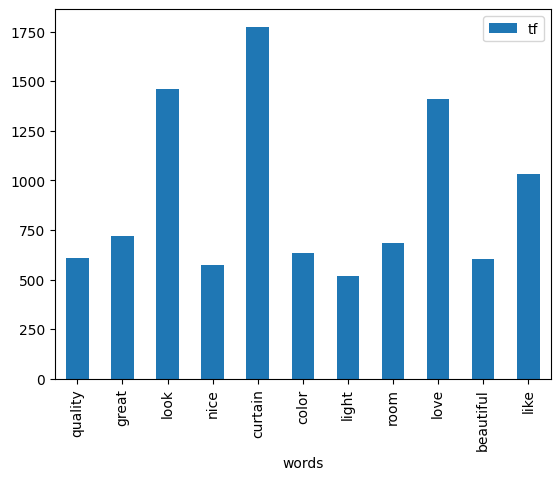

In [60]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

In [61]:
###############################
# Wordcloud
###############################
# Görev 3: WordCloud görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz
        # b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz
        # c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.
        # d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)

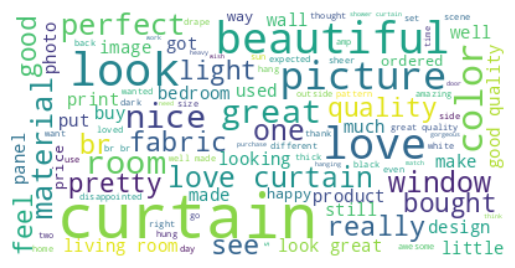

In [62]:
text = " ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [63]:
##############################################################
# Görev 3: Duygu Analizi
##############################################################

In [64]:
# Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
# Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarının incelenmesi
                # a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız
                # b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz
                # c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz
                # d. "Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz

In [66]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

,Review
0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
1,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp..."
2,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp..."
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp..."
7,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp..."


In [67]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

,Review
0,0.57
1,0.44
2,0.72
3,0.00
4,0.90
5,0.00
6,0.62
7,0.93
8,0.00
9,0.71


In [68]:
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

,Review
0,pos
1,pos
2,pos
3,neg
4,pos
5,neg
6,pos
7,pos
8,neg
9,pos


In [69]:
df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [70]:
df.head()

,Star,HelpFul,Title,Review,Sentiment_Label
0,5,0,looks great,happy,pos
1,5,0,Pattern did not align between the two panels.,good quality material however panel mis-matched.,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windows.<br />imagery bit ...,pos
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,neg
4,5,0,Wow great purchase,great bang buck can't believe quality material...,pos


In [71]:
df.groupby("Sentiment_Label")["Star"].mean()

,Star
Sentiment_Label,
neg,3.45
pos,4.57


In [72]:
###############################
# GÖREV 4: Makine öğrenmesine hazırlık!
###############################

In [73]:
# Adım 1: Bağımlı ve bağımsız değişkenlerimizi belirleyerek datayı train test olara ayırınız.

# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

In [74]:
# Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte.
           # a. TfidfVectorizer kullanarak bir nesne oluşturunuz.
           # b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.
           # c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.

# TF-IDF Word Level

tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [75]:
###############################
# Görev 5: Modelleme (Lojistik Regresyon)
###############################

In [76]:
# Adım 1: Lojistik regresyon modelini kurarak train dataları ile fit ediniz.

log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

In [77]:
# Adım 2: Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz.
        # a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.
        # b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.
        # c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız

y_pred = log_model.predict(x_test_tf_idf_word)

classification_report(y_pred, test_y)

'              precision    recall  f1-score   support\n\n         neg       0.31      0.97      0.47        72\n         pos       1.00      0.89      0.94      1331\n\n    accuracy                           0.89      1403\n   macro avg       0.66      0.93      0.71      1403\nweighted avg       0.96      0.89      0.91      1403\n'

In [78]:
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.8538891713268937

In [79]:
# Adım 3: Veride bulunan yorumlardan ratgele seçerek modele sorulması.
        # a. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçierek yeni bir değere atayınız
        # b. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.
        # c. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.
        # d. Kurmuş olduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.
        # e. Örneklemi ve tahmin sonucunu ekrana yazdırınız.


random_review = pd.Series(df["Review"].sample(1).values)
yeni_yorum = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model.predict(yeni_yorum)

f'Review:  {random_review[0]} \n Prediction: {pred}'

"Review:  soooooo beautiful lighten room. high quality good value money.i bought long short sizes. make bedroom gorgeous \n Prediction: ['pos']"

In [80]:
###############################
# Görev 6: Modelleme (Random Forest)
###############################
# Adım 1: Random Forest modeliiletahminsonuçlarınıngözlenmesi;
         # a. RandomForestClassifier modelini kurup fit ediniz.
         # b. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız
         # c. Lojistik regresyon modeli ile sonuçları karşılaştırınız.

rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.9044814438230808